Welcome to my notebook!<br>
This is my first notebook that is not based in a class or project from a course so please let me know how I can make it better. I bet many of you will have suggestions and criticism. In the end, I'm here to learn, be better and decided to test my knowledge with Kiva's project.<br>
If you think this notebook is heading somewhere and can be meaningful to others then upvote it! I'll like to have as many people looking at my notebook and share their point of view. You don't get better by just being told you are doing a good job, but rather by suggestions and criticism.<br>
Thank you!

# Glossary

- <a href='#introduction'>1 Intruction of notebook:</a>
- <a href='#import'>2 Importing and installing dependencies:</a>
- <a href='#manipulating'>3 Manipulating the dataset for better usage:</a>
    - <a href='#dataset'>3.1 Saving and displaying parts of the dataset</a>
    - <a href='#converting'>3.2 Converting columns to lower case and displaying thir meanings</a>
    - <a href='#description'>3.3 Displying the total amount of rows the dataset has in each column</a>
    - <a href='#overview'>3.4 Overview of the dataset:</a>
    - <a href='#dates'>3.5 Splitting the dates to year, month, day for future use:</a>
    - <a href='#missingvalues'>3.6 Checking if any of the columns have any missing values:<a/>
- <a href='#kivaloans'>4 Analyzing kiva_loans:</a>
    - <a href='#regions'>4.1 Displaying which world regions got the most loans</a>
        - <a href='#countries'>4.1.2 Displaying the countries and sectors that got the most money invested</a>
    - <a href='#currency'>4.2 Displaying the currency that was used the most</a>
        - <a href='#values'>4.2.1 Analyzing the value of the PHP & USD</a>
    - <a href='#sectors'>4.3 Displaying the sectors that got the most money invested</a>
        - <a href='#funded_amount'>4.3.1 Analyzing whether or not each sector is funded after asking for loans</a>
        - <a href='#frequent_investment'>4.3.2 Analyzing if the same sectors get invested as often</a>
        - <a href='#sectors_years'>4.3.3 Analyzing how these sectors get funded through the years</a>
    - <a href='#use'>4.4 Analyzing what is the most common usage of loans</a>
        - <a href='#activity_funded'>4.4.1 Analyzing whether or not Kiva is able to fund these loans</a>
        - <a href='#use_years'>4.4.2 Analyzing if these uses change thorugh the years:</a>
    - <a href='#lenders'>4.5 Analyzing lenders from kiva</a>
        - <a href='#loan_amount'>4.5.1 Analyzing which sex lends more money</a>
        - <a href='#lender_amount'>4.5.2 Analyzing how many lenders usually invest in 1 loan</a>
    - <a href='#repayment'>4.6 Analyzing the most popular repayment type</a>
        - <a href='#repayment_year'>4.6.1 Analyzing repayments by year</a>
        - <a href='#terms'>4.6.2 Analyzing on average how long it takes to pay the loans</a>
- <a href='#loan_themes'>5 Analyzing which partners invest the most money</a>
    - <a href='#loan_partners'>5.1 Analyzing which partners invest the most money</a>
    - <a href='#loan_amount'>5.2 Analyzing which partners invest the most money</a>
- <a href='#philippines'>6 Analyzing the Philippines:</a>
    - <a href='#philippinesintro'>6.1 Introduction of the Philippines</a>
    - <a href='#philippinesdataset'>6.2 Analyzing only the Philippines from the dataset</a>
        - <a href='#philippinesloans'>6.2.1 Displaying where the loans are going based in the sector</a>
        - <a href='#philippinesretail'>6.2.2 Analyzing the retail sector</a>
        - <a href='#philippinesactivity'>6.2.3 Analyzing the most common usage of loans in retail</a>
        - <a href='#philippinestimeline'>6.2.4 Analyzing whether this borrowing pattern has increased overtime based on the timeline provided in the dataset</a>
        - <a href='#philippinesrepayment'>6.2.5 Analyzing if Philippines repays the loans</a>
- <a href='#kenya'>7 Analyzing Kenya:</a>
    - <a href='#kenyaintro'>7.1 Introduction of Kenya</a>
    - <a href='#kenyadataset'>7.2 Analyzing only Kenya from the dataset</a>
        - <a href='#kenyasector'>7.2.1 Displaying where the loans are going based in the sector</a>
        - <a href='#kenyaactivity'>7.2.2 Analyzing each activity in more detail</a>
- <a href='#salvador'>8 Analyzing El Salvador:</a>
    - <a href='#salvadorintro'>8.1 Introduction of El Salvador</a>
    - <a href='#salvadordataset'>8.2 Analyzing only El Salvador from the dataset</a>
    - <a href='#salvadorsector'>8.3 Displaying where the loans are going based in the sector</a>
        - <a href='#salvadoractivity'>8.3.1 Analyzing each activity in agriculture</a>
        - <a href='#salvadoruse'>8.3.2 Analyzing the different uses of the money in agriculture</a>

# <a id='introduction'>1 Introduction of notebook</a>

# Data Science for Good: Kiva Crowdfunding

Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people. In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.

In Kaggle Datasets' inaugural Data Science for Good challenge, Kiva is inviting the Kaggle community to help them build more localized models to estimate the poverty levels of residents in the regions where Kiva has active loans. Unlike traditional machine learning competitions with rigid evaluation criteria, participants will develop their own creative approaches to addressing the objective. Instead of making a prediction file as in a supervised machine learning problem, submissions in this challenge will take the form of Python and/or R data analyses using Kernels, Kaggle's hosted Jupyter Notebooks-based workbench.

Kiva has provided a dataset of loans issued over the last two years, and participants are invited to use this data as well as source external public datasets to help Kiva build models for assessing borrower welfare levels. Participants will write kernels on this dataset to submit as solutions to this objective and five winners will be selected by Kiva judges at the close of the event. In addition, awards will be made to encourage public code and data sharing. With a stronger understanding of their borrowers and their poverty levels, Kiva will be able to better assess and maximize the impact of their work.

The sections that follow describe in more detail how to participate, win, and use available resources to make a contribution towards helping Kiva better understand and help entrepreneurs around the world.

# <a id="iimport">2 Importing and installing dependencies:</a>

In [1]:
# Importing dependencies:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

print('Installed all dependencies!')

Installed all dependencies!


# <a id='manipulating'>3 Manipulating the dataset for better usage</a>

## <a id='dataset'>3.1 Saving and displaying parts of the dataset:</a>

In [2]:
# Exploring the data:
# I'm creating this notebook locally so the path of the files differ from Kaggle.

# # Kiva dataset - Kaggle format:
# kiva_loans = pd.read_csv('../input/data-science-for-good-kiva-crowdfunding/kiva_loans.csv')
# kiva_mpi_region_locations = pd.read_csv('../input/data-science-for-good-kiva-crowdfunding//kiva_mpi_region_locations.csv')
# loan_theme_ids = pd.read_csv('../input/data-science-for-good-kiva-crowdfunding/loan_theme_ids.csv')
# loan_themes_by_region = pd.read_csv('../input/data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv')

# # Multidimensional Poverty Index - Kaggle format:
# MPI_national = pd.read_csv('../input/mpi/MPI_national.csv')
# MPI_subnational = pd.read_csv('../input/mpi/MPI_subnational.csv')

# Kiva dataset:
kiva_loans = pd.read_csv('../kiva_loans.csv')
kiva_mpi_region_locations = pd.read_csv('../kiva_mpi_region_locations.csv')
loan_theme_ids = pd.read_csv('../loan_theme_ids.csv')
loan_themes_by_region = pd.read_csv('../loan_themes_by_region.csv')

# Multidimensional Poverty Index:
MPI_national = pd.read_csv('../MPI_national.csv')
MPI_subnational = pd.read_csv('../MPI_subnational.csv')

MPI_subnational.head()

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67.5,57.3
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79.3,58.8
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59.7,50.3
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55.7,54.1
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61.0,53.3


## <a id='converting'>3.2 Converting columns to lower case and displaying their meanings:</a>

In [3]:
# Converting dataset to lowercase for easier future use:

kiva_loans.columns = [x.lower() for x in kiva_loans.columns]
kiva_mpi_region_locations.columns = [x.lower() for x in kiva_mpi_region_locations.columns]
loan_theme_ids.columns = [x.lower() for x in loan_theme_ids.columns]
loan_themes_by_region.columns = [x.lower() for x in loan_themes_by_region.columns]
MPI_national.columns = [x.lower() for x in MPI_national.columns]
MPI_subnational.columns = [x.lower() for x in MPI_subnational.columns]

<b>File: kiva_loans.csv</b>
- id: Unique ID for loan
- funded_amount: Dollar value of loan funded on Kiva.org
- loan_amount: Total dollar amount of loan
- activity: Loan activity type
- sector: Sector of loan activity as shown to lenders
- use: text description of how loan will be used
- country_code: 2-letter Country ISO Code
- country: country name
- region: name of location within country
- currency: currency in which loan is disbursed
- partner_id: Unique ID for field partners
- posted_time: date and time when loan was posted on kiva.org
- disbursed_time: date and time that the borrower received the loan
- funded_time: date and time at which loan was fully funded on kiva.org
- term_in_months: number of months over which loan was scheduled to be paid back
- lender_count: number of lenders contributing to loan
- tags: tags visible to lenders describing loan type
- borrower_genders: gender of borrower(s)
- repayment_interval: frequency at which lenders are scheduled to receive installments
- date: date on which loan was posted<br>

<b>File: kiva_mpi_region_locations.csv</b>
- LocationName: "{region}, {country}" - Unique ID for region
- ISO: Unique ID for country
- country: country name
- region: name of location within country
- world_region: General global region
- MPI: Multi-dimensional poverty index for this region
- geo: Lat-Lon pair
- lat: latitude
- lon: longitude <br>

<b>File: loan_theme_ids.csv</b>
- id: Unique ID for loan (Loan ID)
- Loan Theme ID: Unique ID for loan theme
- Loan Theme Type: General description of the loan theme category
- Parner ID: Unique ID for field partners (Partner ID) <br>

<b>File: loan_themes_by_region.csv</b>
- Partner ID: Unique ID for field partners
- Field Partner Name: Name of Field Partner
- sector: Sector in which a loan is placed on Kiva's main page
- Loan Theme ID: Unique ID for loan theme
- Loan Theme Type: General description of the loan theme category
- country: country name
- forkiva: Was this loan theme created specifically for Kiva?
- region: Region within country
- geocode_old: Kiva's old geocoding system Lots of missing values
- ISO: Unique ID for country
- number: Number of loans funded in this LocationName and this loan theme
- amount: Dollar value of loans funded in this LocationName and this loan theme
- LocationName: "{region}, {country}" - Unique ID for region
- geocode: Lat-Lon pair
- names: All placenames that the Gmaps API associates with LocationName
- geo: Lat-Lon pair
- lat: latitude
- lon: longitude
- mpi_region: MPI Region where we think this loan theme is located
- mpi_geo: Lat-Lon pair where we think this MPI region is located
- rural_pct: The percentage of this field partners' borrowers that are in rural areas- 

<em>Source: https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding/discussion/50585</em>

## <a id='description'>3.3 Displying the total amount of rows kiva_loans has in each column:</a>

In [4]:
# Analizing the dataset:

print('kiva_loans Shape: ', kiva_loans.shape)
print('-' * 40)
print(pd.DataFrame(kiva_loans.info()))

kiva_loans Shape:  (671205, 20)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null int64
loan_amount           671205 non-null int64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null int64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_

## <a id='overview'>3.4 Overview of kiva_loans:</a>

In [5]:
# Overview of the dataset:

kiva_loans.describe(include=['O'])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,3/20/17
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


## <a id='dates'>3.5 Splitting the dates to year, month, day for future use:</a>

In [6]:
# Changing the date column to to_datetime:

kiva_loans['date'] = pd.to_datetime(kiva_loans['date'])
kiva_loans['year'] = pd.DataFrame(kiva_loans['date'].dt.year)
kiva_loans['month'] = pd.DataFrame(kiva_loans['date'].dt.month)
kiva_loans['day'] = pd.DataFrame(kiva_loans['date'].dt.day)
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,year,month,day
0,653051,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12,12,NaN,female,irregular,2014-01-01,2014,1,1
1,653053,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11,14,NaN,"female, female",irregular,2014-01-01,2014,1,1
2,653068,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43,6,"user_favorite, user_favorite",female,bullet,2014-01-01,2014,1,1
3,653063,200,200,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11,8,NaN,female,irregular,2014-01-01,2014,1,1
4,653084,400,400,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14,16,NaN,female,monthly,2014-01-01,2014,1,1


## <a id='missingvalues'>3.6 Checking if any of the columns have any missing values:</a>

In [7]:
null_values = pd.DataFrame(kiva_loans.isnull().sum().sort_values(ascending=False))
null_values.columns = ['total_null']
null_values

,total_null
tags,171416
region,56800
funded_time,48331
partner_id,13507
use,4232
borrower_genders,4221
disbursed_time,2396
country_code,8
day,0
funded_amount,0


# <a id='kivaloans'>4 Analyzing kiva_loans</a>

## <a id='regions'>4.1 Displaying which continents got the most loans:</a>

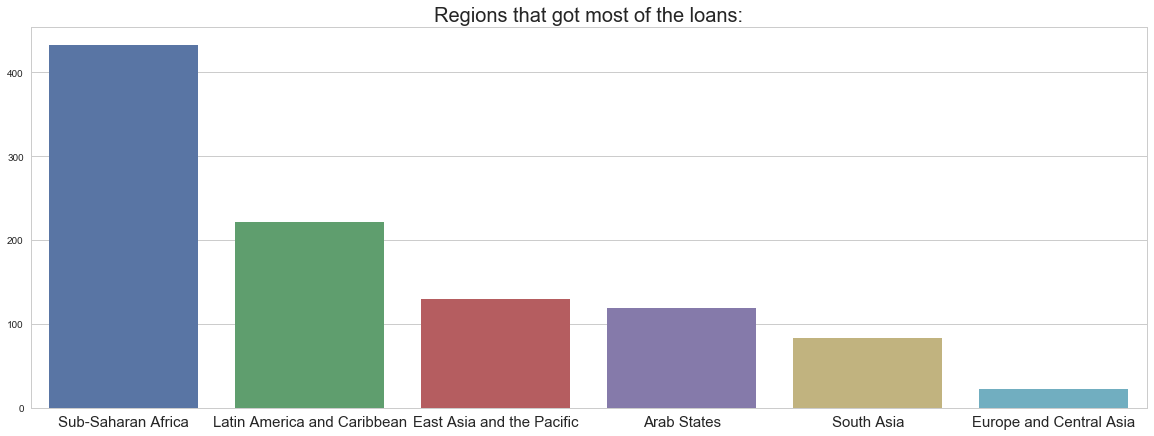

In [8]:
kiva_regions = pd.DataFrame(kiva_mpi_region_locations['world_region'].value_counts())
kiva_regions.reset_index(inplace=True)
kiva_regions.columns = ['world_region', 'total_amount']

plt.figure(figsize=(20, 7))

sns.set(style="whitegrid")
barplot = sns.barplot(x=kiva_regions['world_region'], y=kiva_regions['total_amount'])
barplot.set(xlabel='', ylabel='')
plt.title('Regions that got most of the loans:', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

The Sub-Saharan region has the most loans invested. Let's see if the individual countries confirm this.

## <a id='countries'>4.1.2 Displaying the countries that got the most loans:</a>

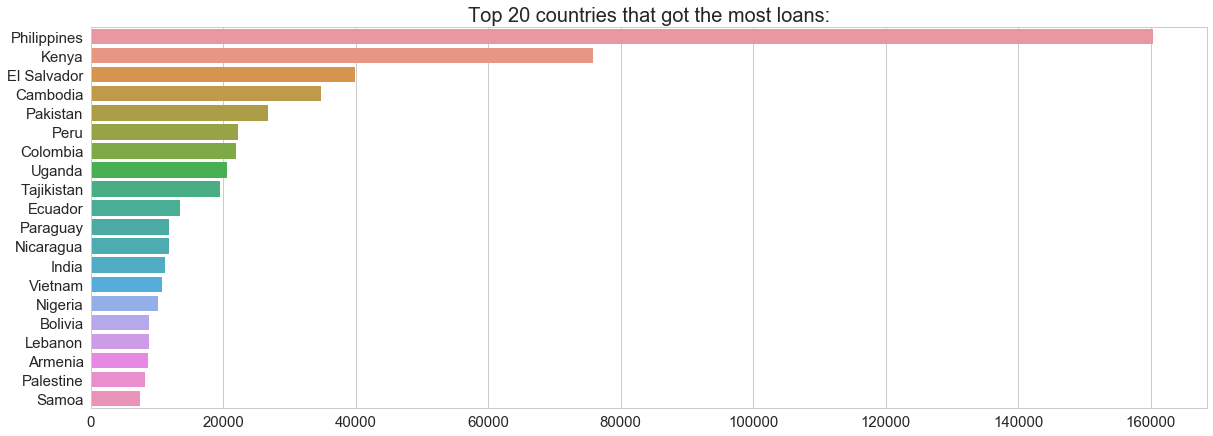

In [19]:
# Displaying the top 10 countries that got the biggest dollar amount in loans:

countries = pd.DataFrame(kiva_loans['country'].value_counts(sort=['loan_amount']))
countries.reset_index(inplace=True)
countries.columns = ['country', 'total_loaned']

# Displaying the results in a graph:

plt.figure(figsize=(20, 7))

sns.set(style="whitegrid")
barplot = sns.barplot(x=countries['total_loaned'][:20], y=countries['country'][:20])
barplot.set(xlabel='', ylabel='')
plt.title('Top 20 countries that got the most loans:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

According to the dataset (only showing 25 countries), Kiva is investing more than twice the amount of money into the Philippines than the 2nd country (Kenya). After that, the investments have more of a steady decline.

## <a id='currency'>4.2 Displaying the currency that was used the most:</a>

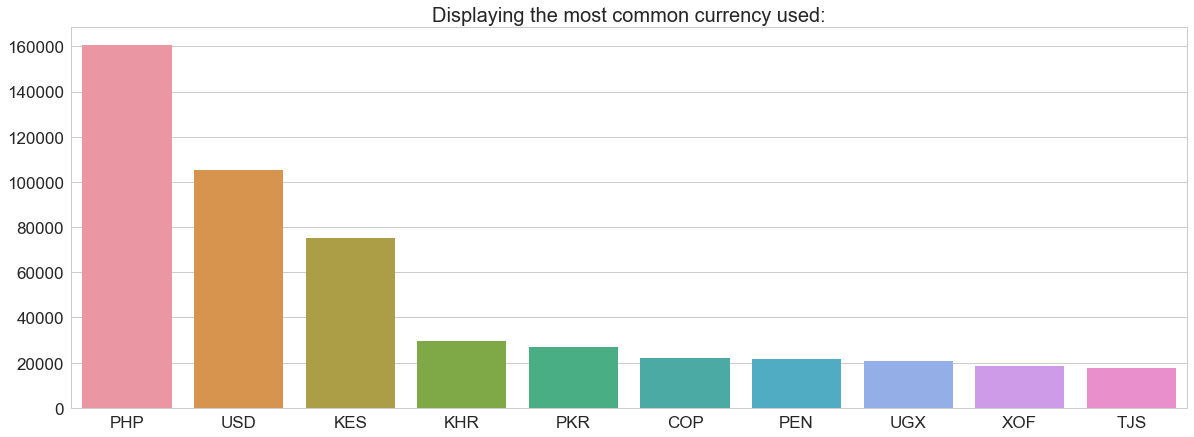

In [10]:
kiva_currency = pd.DataFrame(kiva_loans['currency'].value_counts(sort='country'))

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=kiva_currency.index[:10], y=kiva_currency['currency'][:10])
barplot.set(xlabel='', ylabel='')
plt.title('Displaying the most common currency used:', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

Since the Philippines is the country that gets most of the investments, it will make sense that their currency will be the one most widely used. However, the value of the PHP is lower than the USD; so let's compare their values.

### <a id='values'>4.2.1 Comparing the value of the PHP & USD:</a>

In [11]:
kiva_php = 52.0640
kiva_usd = 1.00
# source: http://www.xe.com/currencyconverter/convert/?Amount=1&From=USD&To=PHP

kiva_currency.head()
kiva_transform = kiva_currency['currency'][0] / kiva_php
print('PHP after exchanged into USD: ',  kiva_transform)
print('Total amount invested in USD:', kiva_currency['currency'][1])

PHP after exchanged into USD:  3081.59188691
Total amount invested in USD: 105494


As we can see, USD is 52 times more valuable than the PHP which will explain the large amount of PHP usage. 

## <a id='sectors'>4.3 Displaying the sectors that got the most money invested:</a>

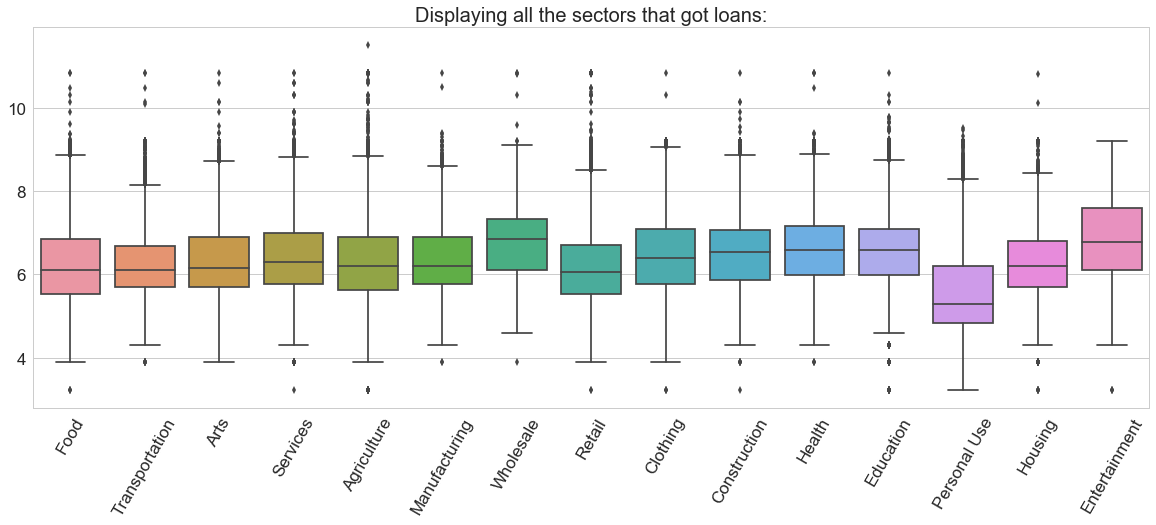

In [12]:
# Displaying the top sectors where money was invested:
kiva_loans['loan_amount_log'] = np.log(kiva_loans['loan_amount'])

plt.figure(figsize=(20, 7))

sns.set_style("whitegrid")
boxplot = sns.boxplot(x='sector', y='loan_amount_log', data=kiva_loans)
boxplot.set(xlabel='', ylabel='')
plt.title('Displaying all the sectors that got loans:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

Agriculture seems to be the most popular investment for Kiva, followed by food and retail slighlty lagging behind. This will make sense since agriculture tends to be the most common investment for poor countries, with a low level of training and easily accissible to people.

### <a id='funded_amount'>4.3.1 Analyzing whether or not each sector is funded after asking for loans:</a>

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


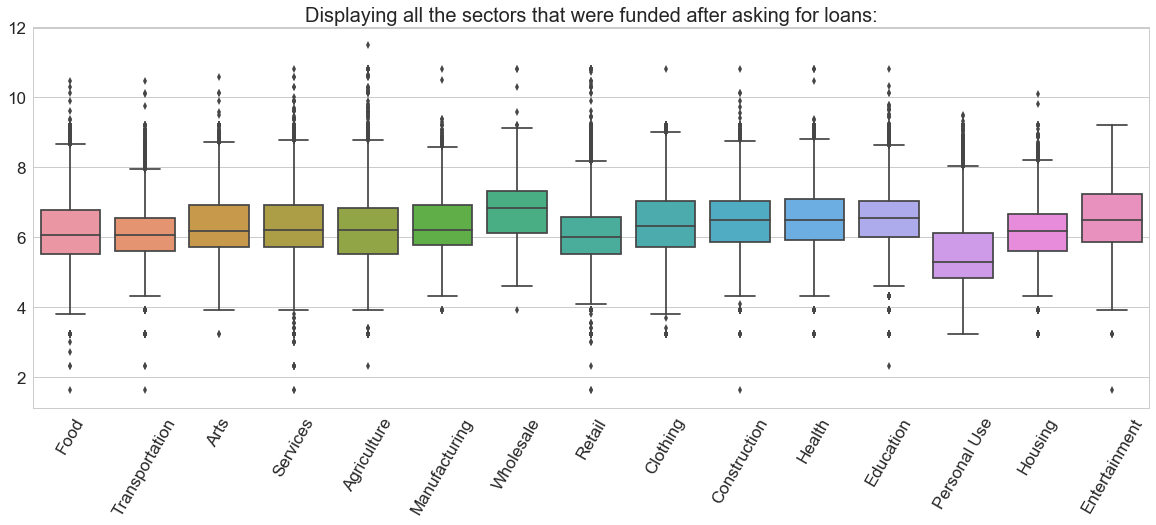

In [13]:
# Displaying the top sectors where money was invested:
kiva_loans['funded_amount_log'] = np.log(kiva_loans['funded_amount'])

plt.figure(figsize=(20, 7))

sns.set_style("whitegrid")
boxplot = sns.boxplot(x='sector', y='funded_amount_log', data=kiva_loans)
boxplot.set(xlabel='', ylabel='')
plt.title('Displaying all the sectors that were funded after asking for loans:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

It seems that Kiva is very good at asking, collecting and investing in the sectors that they originally plan to invest in.

### <a id='frequent_investment'>4.3.2 Analyzing if the same sectors get invested as often:</a>

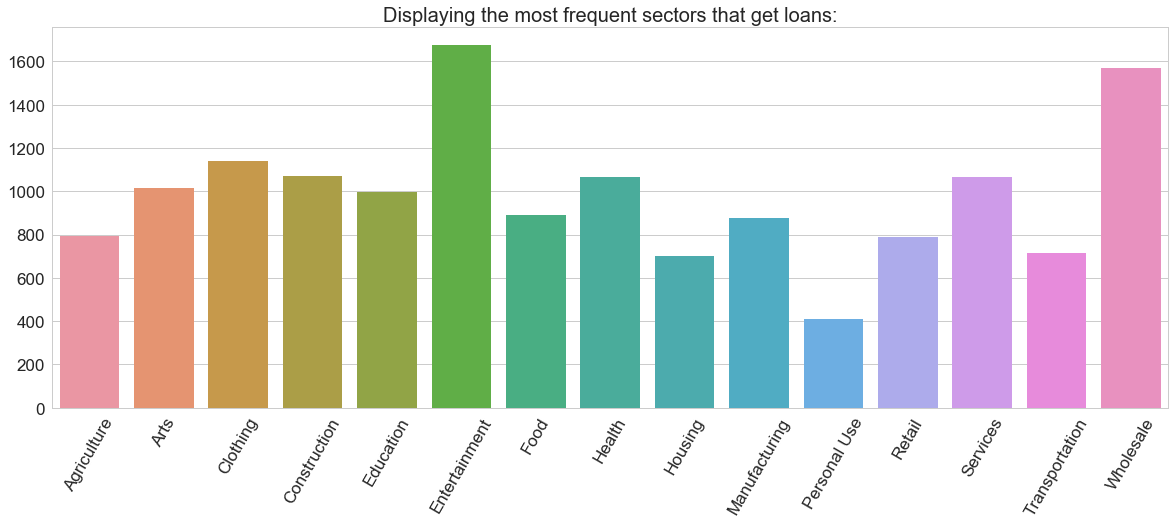

In [14]:
kiva_loans_sectors = pd.DataFrame(kiva_loans.groupby(['sector'])['loan_amount'].mean())
kiva_loans_sectors.reset_index(inplace=True)
kiva_loans_sectors.columns = ['sector', 'average_frequent_sectors']

plt.figure(figsize=(20, 7))

sns.set_style("whitegrid")
boxplot = sns.barplot(x='sector', y='average_frequent_sectors', data=kiva_loans_sectors)
boxplot.set(xlabel='', ylabel='')
plt.title('Displaying the most frequent sectors that get loans:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

Even though most of the money gets invested in agriculture and food, many loans in smaller amounts are invested on the entertainment and wholesale sectors.

### <a id='sectors_years'>4.3.3 Analyzing how these sectors get funded through the years:</a>

In [15]:
light_palette = sns.light_palette("cyan", as_cmap=True)
pd.crosstab(kiva_loans['sector'], kiva_loans['year']).style.background_gradient(cmap=light_palette)

year,2014,2015,2016,2017
sector,,,,
Agriculture,44038,50159,52647,33458
Arts,2610,2983,3909,2558
Clothing,9904,8832,8957,5049
Construction,1889,1727,1648,1004
Education,8338,7647,9959,5069
Entertainment,219,225,245,141
Food,36539,37809,39723,22586
Health,1637,2262,3446,1878
Housing,10916,8055,9234,5526


Agriculture seems to be the most invested sector through the years presented in the dataset.

## <a id='use'>4.4 Analyzing what is the most common usage of loans: </a>

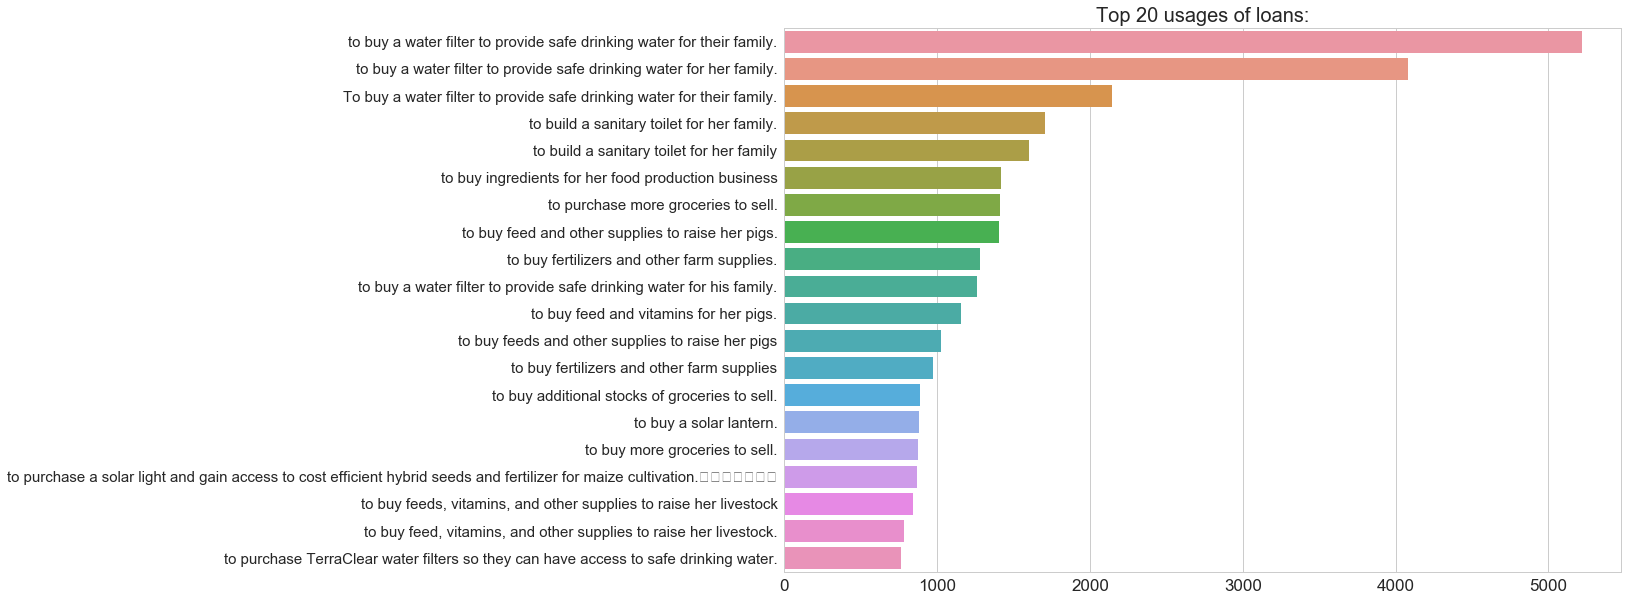

In [16]:
kiva_use = pd.DataFrame(kiva_loans['use'].value_counts(sort='loan_amount'))
kiva_use.reset_index(inplace=True)
kiva_use.columns = ['use', 'total_amount']

plt.figure(figsize=(15, 10))

barplot = sns.barplot(x=kiva_use['total_amount'][:20], y=kiva_use['use'][:20])
barplot.set(xlabel='', ylabel='')
plt.title('Top 20 usages of loans:', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.show()

The top usages of investments are to provide for basic human needs. As shown in the graph above, the top 3 are for clean water, then the 45h & 5th are for hygene; and the rest are for food supplies or farming food.

### <a id='activity_funded'>4.4.1 Analyzing whether or not Kiva is able to fund these loans:</a>

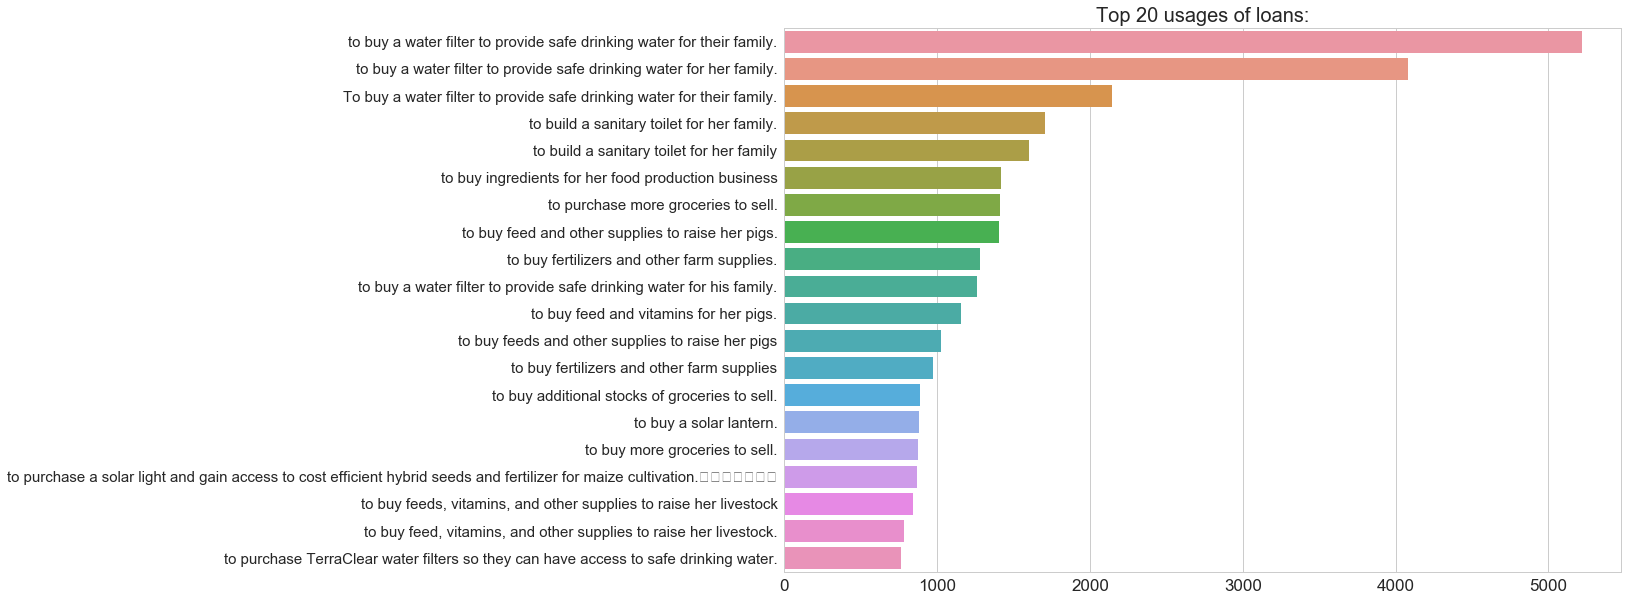

In [17]:
kiva_loans_funded = pd.DataFrame(kiva_loans['use'].value_counts('funded_amount'))
kiva_loans_funded.reset_index(inplace=True)
kiva_loans_funded.columns = ['use', 'total_amount']

plt.figure(figsize=(15, 10))

barplot = sns.barplot(x=kiva_use['total_amount'][:20], y=kiva_use['use'][:20])
barplot.set(xlabel='', ylabel='')
plt.title('Top 20 usages of loans:', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.show()

Kiva seems to be doing very well funding what they actually say they will fund.

### <a id='use_years'>4.4.2 Analyzing if these uses change thorugh the years:</a>

In [36]:
# kiva_activity = kiva_loans.groupby(['activity']).sum().sort_values(by='year')
# kiva_activity.reset_index(inplace=True)

light_palette = sns.light_palette("cyan", as_cmap=True)
pd.crosstab(kiva_loans['activity'], kiva_loans['year']).style.background_gradient(cmap=light_palette)

year,2014,2015,2016,2017
activity,,,,
Adult Care,1,0,0,1
Agriculture,9292,8342,6033,3356
Air Conditioning,9,10,12,5
Animal Sales,2670,2543,2578,1446
Aquaculture,1,0,0,107
Arts,183,281,344,284
Auto Repair,382,382,383,189
Bakery,959,1038,1066,557
Balut-Making,13,25,13,10


## <a id='lenders'>4.5 Analyzing lenders from Kiva:</a>

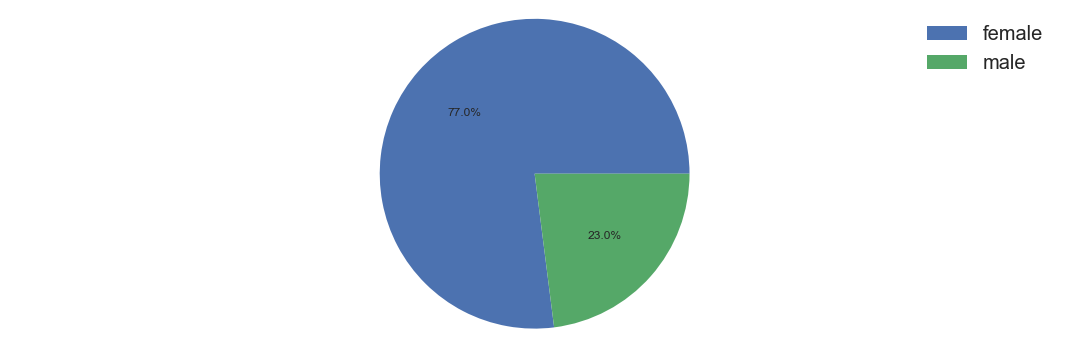

In [37]:
# Splitting the genders into female/male and counting them:
kiva_loans['borrower_genders'] = kiva_loans['borrower_genders'].astype(str)
gender_list = pd.DataFrame(kiva_loans['borrower_genders'].str.split(',').tolist())
kiva_loans['clean_borrower_genders'] = gender_list[0]
kiva_loans.loc[kiva_loans['clean_borrower_genders'] == 'nan', 'clean_borrower_genders'] = np.nan

kiva_gender = kiva_loans['clean_borrower_genders'].value_counts()
labels = kiva_gender.index

plt.figure(figsize=(15, 5))

patches = plt.pie(kiva_gender, autopct='%1.1f%%')
plt.legend(labels, fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

Females tend to invest more frequently than males. Let's investigate whether or not they invest more money than males.

### <a id='loan_amount'>4.5.1 Analyzing which sex lends more money:</a>

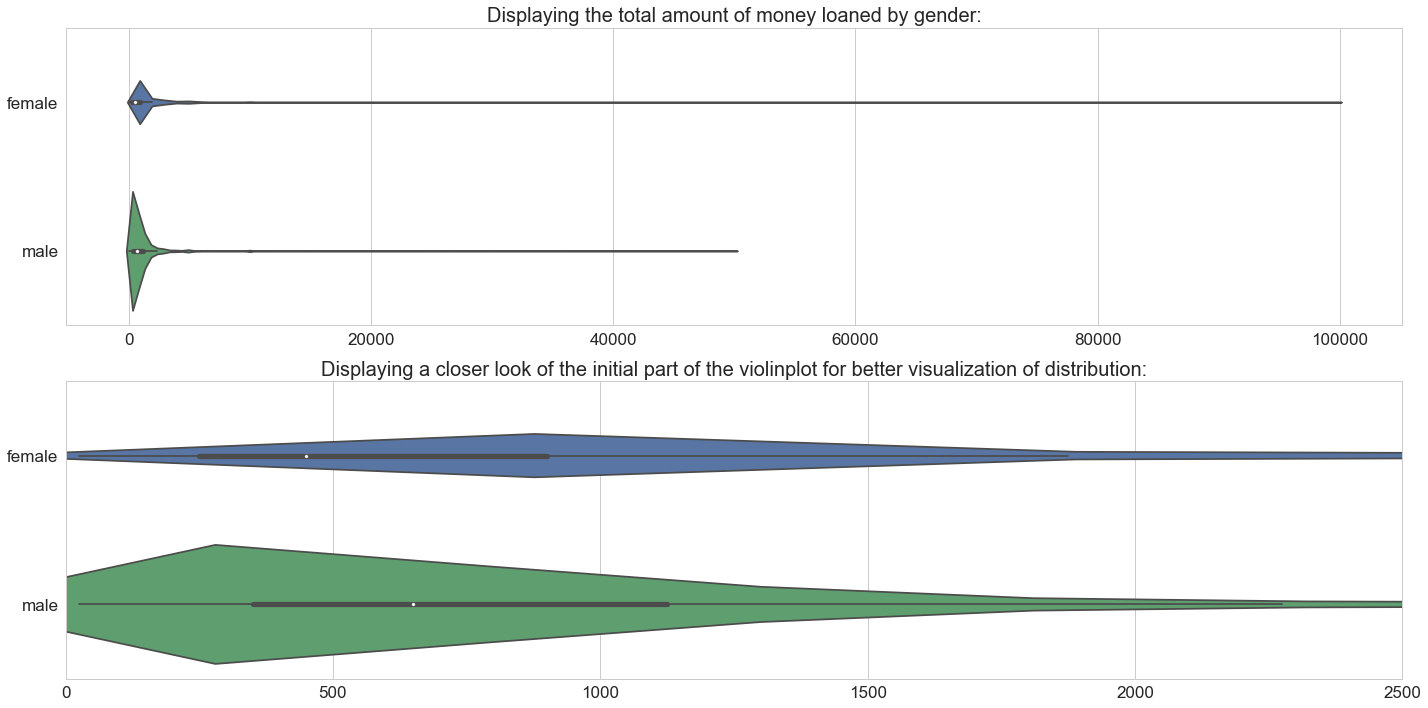

In [38]:
sex_mean = kiva_loans.groupby('clean_borrower_genders').count()

fig = plt.figure(figsize=(20, 10))
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17

plt.subplot(211)
ax1 = sns.violinplot(kiva_loans['loan_amount'], kiva_loans['clean_borrower_genders'])
ax1.set(xlabel='', ylabel='')
ax1.set_title('Displaying the total amount of money loaned by gender:', fontsize=20)

plt.subplot(212)
ax2 = sns.violinplot(kiva_loans['loan_amount'], kiva_loans['clean_borrower_genders'])
ax2.set(xlabel='', ylabel='')
ax2.set_title('Displaying a closer look of the initial part of the violinplot for better visualization of distribution:', fontsize=20)
ax2.set_xlim(0, 2500)

plt.tight_layout()
plt.show()

Interestingly, males tend to invest less frequently but the majority of their investments present a consistent number; even though females compose more than 75% of the total investments.

### <a id='lender_amount'>4.5.2 Analyzing how many lenders usually invest in 1 loan:</a>

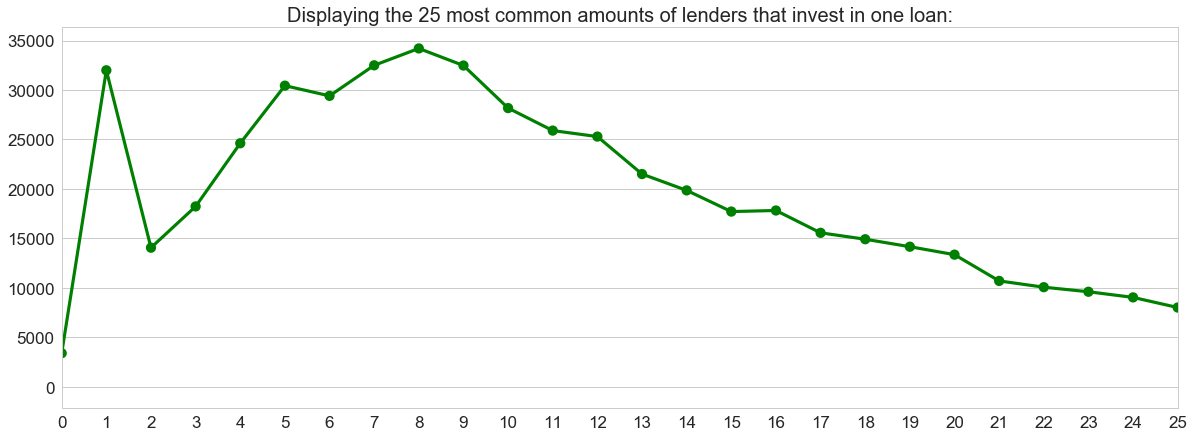

In [39]:
kiva_loan = pd.DataFrame(kiva_loans['lender_count'].value_counts())
kiva_loan.reset_index(inplace=True)
kiva_loan.columns = ['lenders', 'total_amount']
kiva_loan

plt.figure(figsize=(20, 7))

pointplot = sns.pointplot(x=kiva_loan['lenders'], y=kiva_loan['total_amount'], color='g')
pointplot.set(xlabel='', ylabel='')
plt.title('Displaying the 25 most common amounts of lenders that invest in one loan:', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlim(0, 25)
plt.show()

It seems that a few investors are capable of investing high amounts of money. 

## <a id='repayment'>4.6 Analyzing the most popular repayment type:</a>

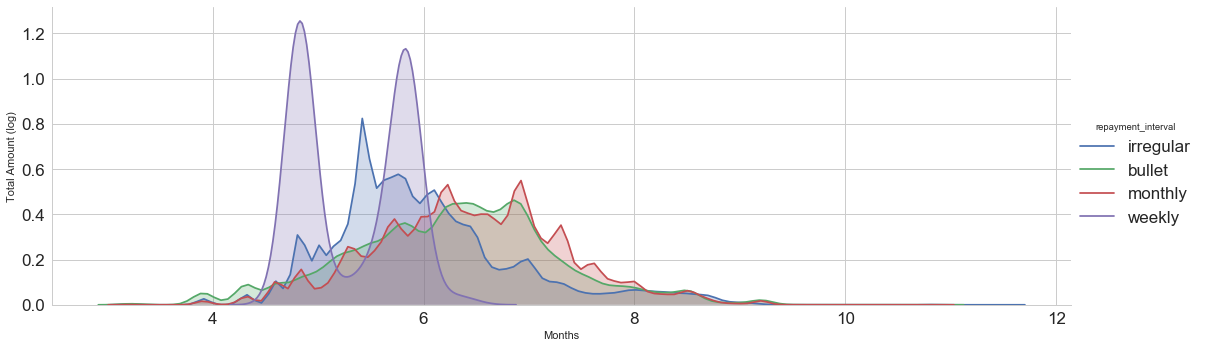

In [40]:
facetgrid = sns.FacetGrid(kiva_loans, hue='repayment_interval', size=5, aspect=3)
facetgrid = (facetgrid.map(sns.kdeplot, 'loan_amount_log', shade=True).set_axis_labels('Months', 'Total Amount (log)').add_legend(fontsize=17))

It seems that most of the loans get repaid in a monthly basis, followed by irregular payments.

### <a id='repayment_year'>4.6.1 Analyzing repayments by year:</a>

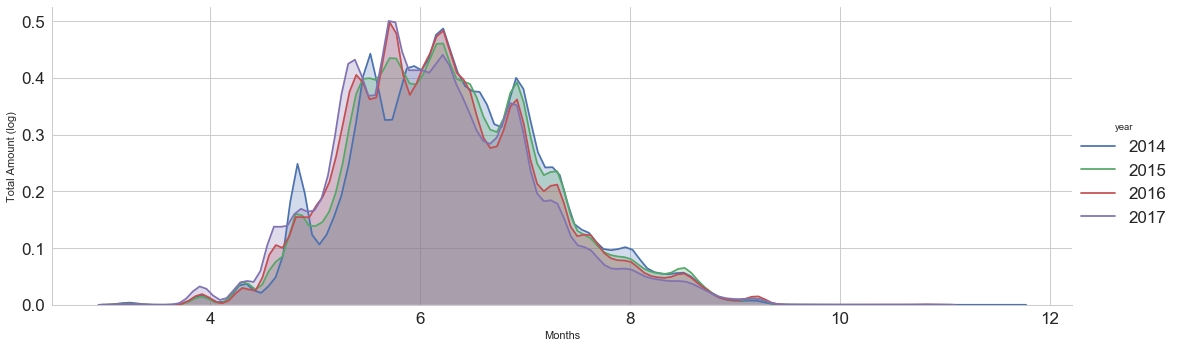

In [41]:
facetgrid = sns.FacetGrid(kiva_loans, hue='year', size=5, aspect=3)
facetgrid = (facetgrid.map(sns.kdeplot, 'loan_amount_log', shade=True).set_axis_labels('Months', 'Total Amount (log)').add_legend(fontsize=17))

It seems that all the years that are found in the dataset have an overall similar repayment.

### <a id='terms'>4.6.2 Analyzing on average how long it takes to pay the loans in months:</a>

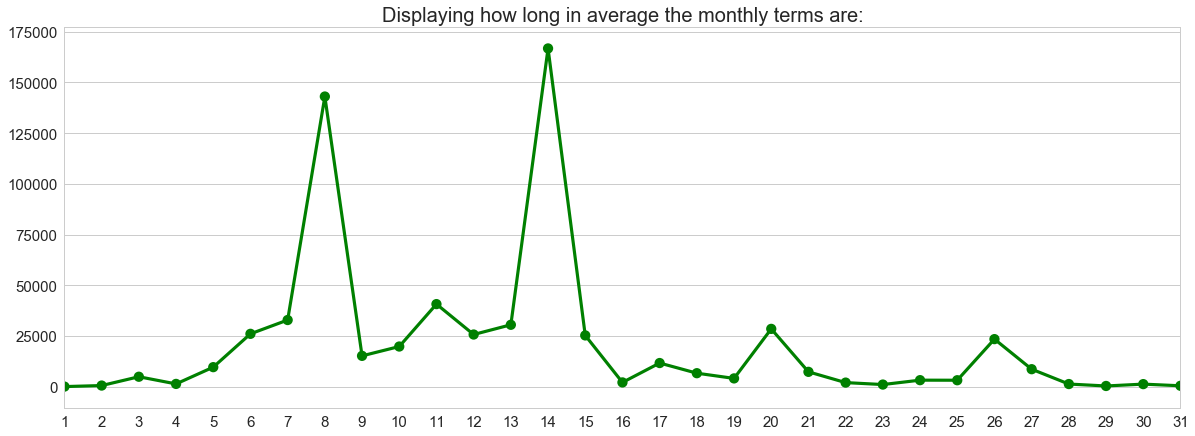

In [42]:
kiva_terms = pd.DataFrame(kiva_loans['term_in_months'].value_counts(sort='country'))
kiva_terms.reset_index(inplace=True)
kiva_terms.columns = ['term_in_months', 'total_amount']

plt.figure(figsize=(20, 7))

pointplot = sns.pointplot(x=kiva_terms['term_in_months'], y=kiva_terms['total_amount'], color='g')
pointplot.set(xlabel='', ylabel='')
plt.title('Displaying how long in average the monthly terms are:', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 30)
plt.show()

On average it takes for loans to be repaid between 7 to 15 months.

# <a id='loan_themes'>5 Analyzing loan_themes_by_region file:</a>

In [43]:
# Analyzing loan themes by region:
loan_themes_by_region.head()

,partner id,field partner name,sector,loan theme id,loan theme type,country,forkiva,region,geocode_old,iso,number,amount,locationname,geocode,names,geo,lat,lon,mpi_region,mpi_geo
0,171,Bai Tushum Bank,General Financial Inclusion,a1050000002YqaF,Green,Kyrgyzstan,No,"""The first May"" village",NaN,KGZ,2,1700,"""The first May"" village, Kyrgyzstan","[(42.7338599, 78.3689411)]",1 May; Tyup; Tyup; Issyk-Kul Region; Kyrgyzstan,"(42.7338599, 78.3689411)",42.73386,78.368941,KGZ,NaN
1,171,Bai Tushum Bank,General Financial Inclusion,a1050000007QIg8,Agriculture,Kyrgyzstan,No,"""The first May"" village",NaN,KGZ,1,300,"""The first May"" village, Kyrgyzstan","[(42.7338599, 78.3689411)]",1 May; Tyup; Tyup; Issyk-Kul Region; Kyrgyzstan,"(42.7338599, 78.3689411)",42.73386,78.368941,KGZ,NaN
2,171,Bai Tushum Bank,General Financial Inclusion,a1050000000wf1B,General,Kyrgyzstan,No,"""The first May"" village",NaN,KGZ,2,2925,"""The first May"" village, Kyrgyzstan","[(42.7338599, 78.3689411)]",1 May; Tyup; Tyup; Issyk-Kul Region; Kyrgyzstan,"(42.7338599, 78.3689411)",42.73386,78.368941,KGZ,NaN
3,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,"#2 Bayabas St. San Gabriel Tuguegarao City,Cag...",NaN,PHL,1,500,"#2 Bayabas St. San Gabriel Tuguegarao City,Cag...",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,PHL,NaN
4,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,"#52C Pagaliluan St. Gosi Sur, Tuguegarao",NaN,PHL,1,1000,"#52C Pagaliluan St. Gosi Sur, Tuguegarao, Phil...",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,PHL,NaN


## <a id='loan_partners'>5.1 Analyzing the partners that invest the most times:</a>

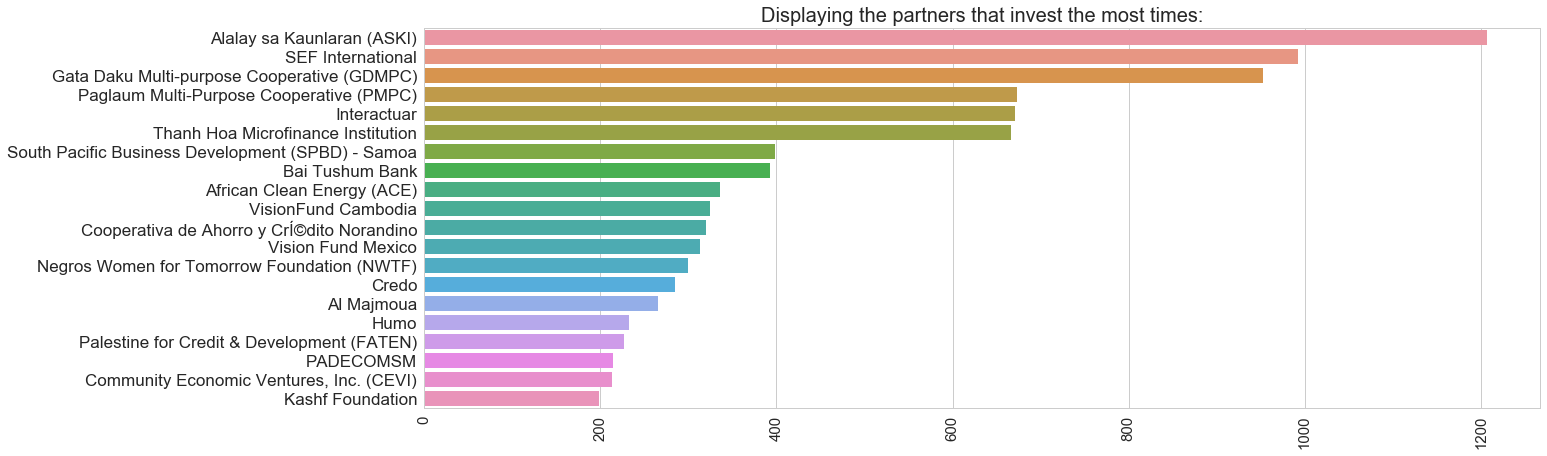

In [44]:
loan_partner = pd.DataFrame(loan_themes_by_region['field partner name'].value_counts(sort=['amount']))
loan_partner.reset_index(inplace=True)
loan_partner.columns = ['partner_name', 'total_amount']
loan_partner.head()

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=loan_partner['total_amount'][:20], y=loan_partner['partner_name'][:20])
barplot.set(xlabel='', ylabel='')
plt.title('Displaying the partners that invest the most times:', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=17)
plt.show()

### <a id='loan_amount'>5.1.1 Analyzing which partners invest the most money:</a>

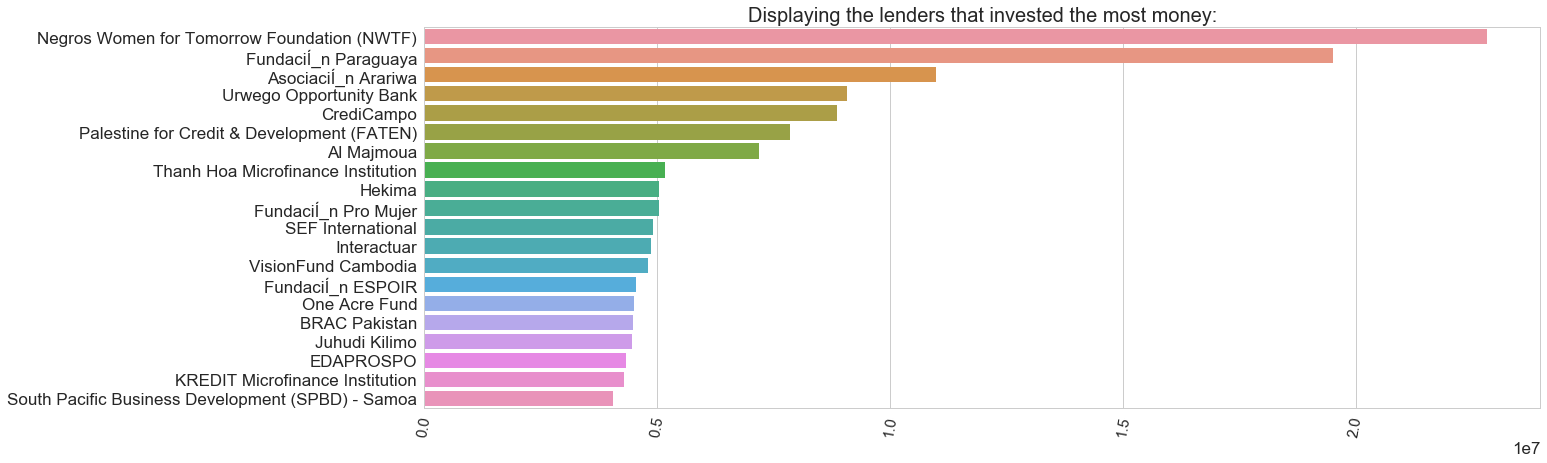

In [45]:
loan_amount = loan_themes_by_region.groupby('field partner name').sum().sort_values(by='amount', ascending=False)
loan_amount.reset_index(inplace=True)
loan_amount.head()

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=loan_amount['amount'][:20], y=loan_amount['field partner name'][:20])
barplot.set(xlabel='', ylabel='')
plt.title('Displaying the lenders that invested the most money:', fontsize=20)
plt.xticks(rotation=80, fontsize=15)
plt.yticks(fontsize=17)
plt.show()

### <a id='loan_regions'>5.1.2 Regions that partners invest the most:</a>

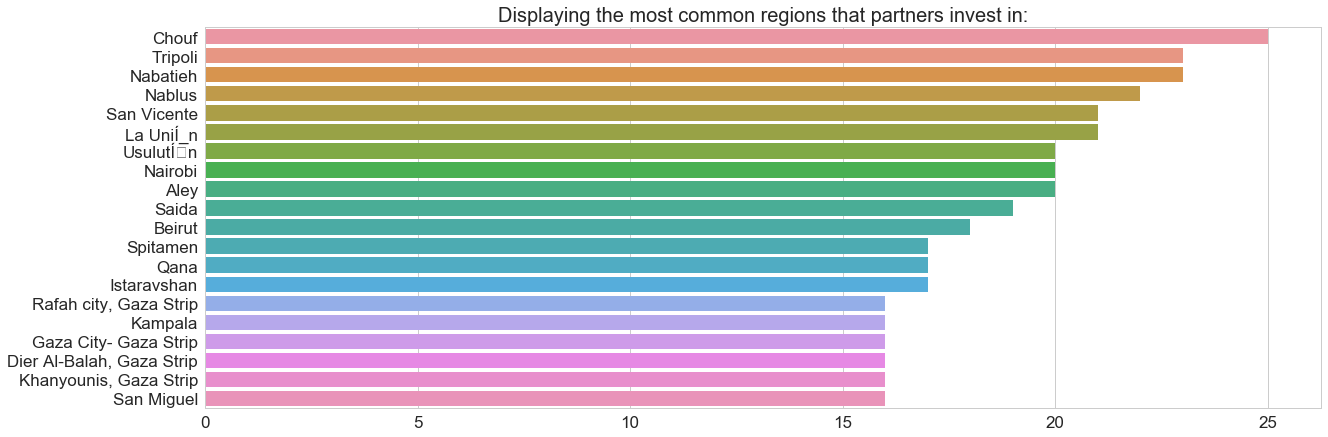

In [46]:
loan_region = pd.DataFrame(loan_themes_by_region['region'].value_counts())
loan_region.reset_index(inplace=True)
loan_region.columns = ['region', 'total_amount']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=loan_region['total_amount'][:20], y=loan_region['region'][:20])
barplot.set(xlabel='', ylabel='')
plt.title('Displaying the most common regions that partners invest in:', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

## <a> 5.2 Analyzing whether the loans themes correlate with kiva_loans:</a>

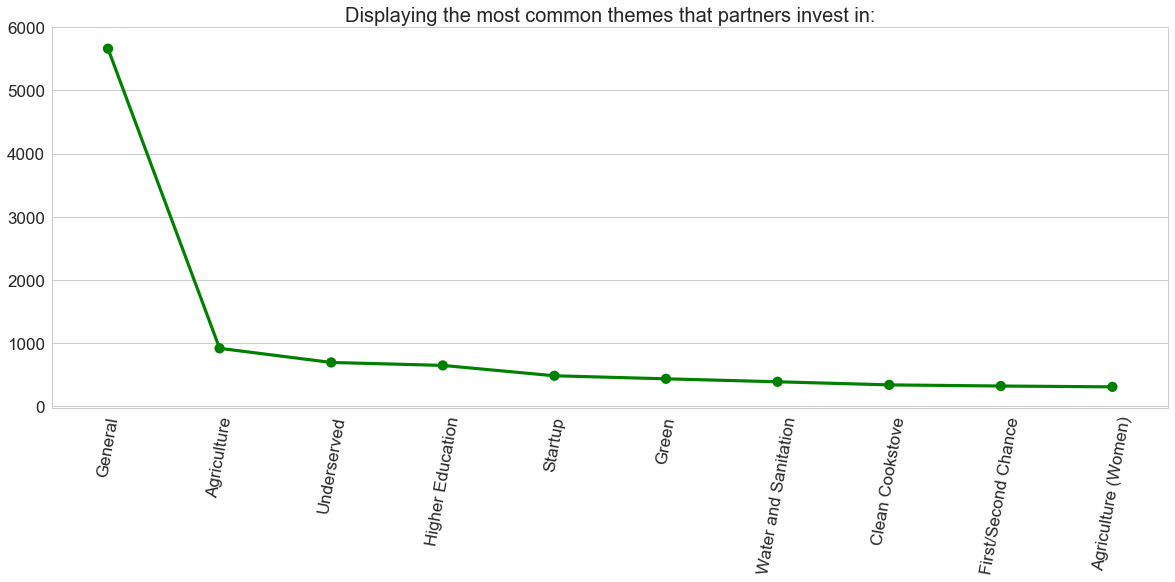

In [47]:
loan_theme = pd.DataFrame(loan_themes_by_region['loan theme type'].value_counts()).reset_index()
loan_theme.columns = ['theme', 'total_amount']

plt.figure(figsize=(20, 7))

barplot = sns.pointplot(x=loan_theme['theme'][:10], y=loan_theme['total_amount'][:10], color='g')
barplot.set(xlabel='', ylabel='')
plt.title('Displaying the most common themes that partners invest in:', fontsize=20)
plt.xticks(rotation=80, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

### <a id=''>5.2.1 Analyzing the general theme in more detail:</a>

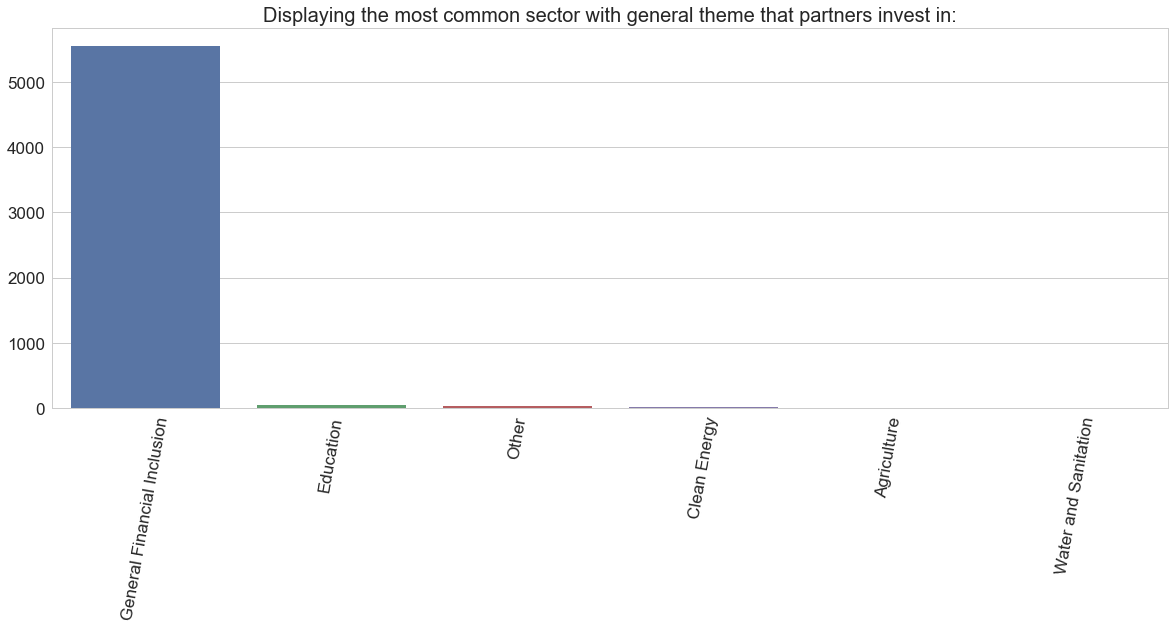

In [48]:
loan_general = pd.DataFrame(loan_themes_by_region[loan_themes_by_region['loan theme type'] == 'General'])
loan_general = pd.DataFrame(loan_general['sector'].value_counts().reset_index())
loan_general.columns = ['sector', 'total_amount']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=loan_general['sector'][:10], y=loan_general['total_amount'][:10])
barplot.set(xlabel='', ylabel='')
plt.title('Displaying the most common sector with general theme that partners invest in:', fontsize=20)
plt.xticks(rotation=80, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

It seems that the theme correlates with kiva_loans file. Even though it does not specifically say where the loans where invested, a general terminolgy was used to group these loans.

## 5.3 Analyzing whether the countries that recieved loans correlate with kiva_loans:

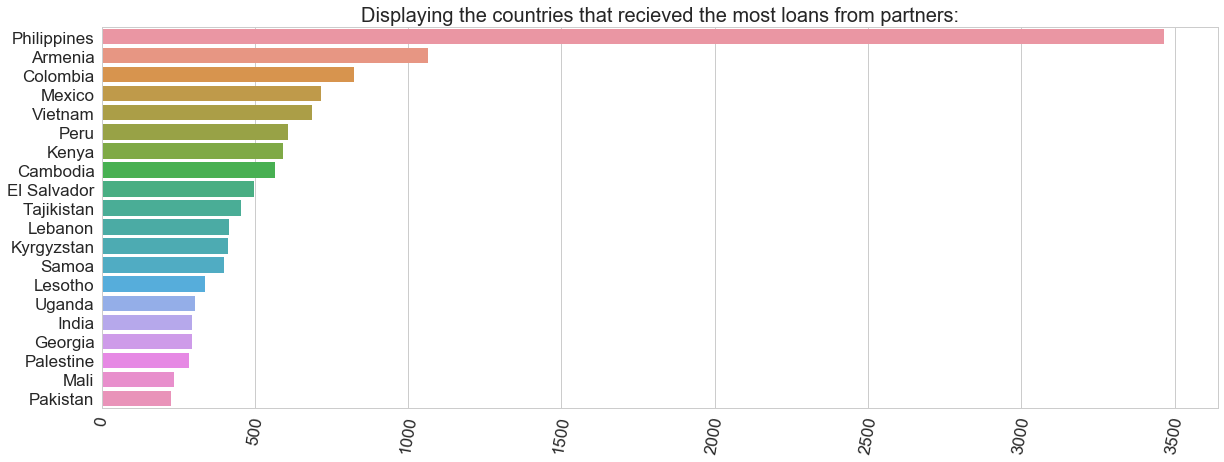

In [49]:
loan_countries = pd.DataFrame(loan_themes_by_region['country'].value_counts()).reset_index()
loan_countries.columns = ['country', 'total_amount']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=loan_countries['total_amount'][:20], y=loan_countries['country'][:20])
barplot.set(xlabel='', ylabel='')
plt.title('Displaying the countries that recieved the most loans from partners:', fontsize=20)
plt.xticks(rotation=80, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

Philippines is the top invested country in both datasets but there are some differences after that. Kenya and El Salvador, which are 2nd and 3rd respectively in kiva_loans, are 7th and 9th in this dataset.

# <a id='philippines'>6 Analyzing the Philippines</a>

## <a id='philippinesintro'>6.1 Introduction of the Philippines:</a>
The Philippine Islands became a Spanish colony during the 16th century; they were ceded to the US in 1898 following the Spanish-American War. In 1935 the Philippines became a self-governing commonwealth. Manuel QUEZON was elected president and was tasked with preparing the country for independence after a 10-year transition. In 1942 the islands fell under Japanese occupation during World War II, and US forces and Filipinos fought together during 1944-45 to regain control. On 4 July 1946 the Republic of the Philippines attained its independence. A 20-year rule by Ferdinand MARCOS ended in 1986, when a "people power" movement in Manila ("EDSA 1") forced him into exile and installed Corazon AQUINO as president. Her presidency was hampered by several coup attempts that prevented a return to full political stability and economic development. Fidel RAMOS was elected president in 1992. His administration was marked by increased stability and by progress on economic reforms. In 1992, the US closed its last military bases on the islands. Joseph ESTRADA was elected president in 1998. He was succeeded by his vice-president, Gloria MACAPAGAL-ARROYO, in January 2001 after ESTRADA's stormy impeachment trial on corruption charges broke down and another "people power" movement ("EDSA 2") demanded his resignation. MACAPAGAL-ARROYO was elected to a six-year term as president in May 2004. Her presidency was marred by several corruption allegations but the Philippine economy was one of the few to avoid contraction following the 2008 global financial crisis, expanding each year of her administration. Benigno AQUINO III was elected to a six-year term as president in May 2010 and was succeeded by Rodrigo DUTERTE in May 2016.<br>
The Philippine Government faces threats from several groups, some of which are on the US Government's Foreign Terrorist Organization list. Manila has waged a decades-long struggle against ethnic Moro insurgencies in the southern Philippines, which has led to a peace accord with the Moro National Liberation Front and ongoing peace talks with the Moro Islamic Liberation Front. The decades-long Maoist-inspired New People's Army insurgency also operates through much of the country. In 2016, Philippine armed forces battled an ISIS-Philippines siege in Marawi City, driving DUTERTE to declare martial law in the region. The Philippines faces increased tension with China over disputed territorial and maritime claims in the South China Sea.<br>
<em>source: https://www.cia.gov/library/publications/the-world-factbook/geos/rp.html</em>

## <a id='philippinesdataset'>6.2 Analyzing only the Philippines from the dataset:</a>

In [50]:
# Saving the Philippines in a variable:

philippines = pd.DataFrame(kiva_loans[kiva_loans['country'] == 'Philippines'])
philippines.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,tags,borrower_genders,repayment_interval,date,year,month,day,loan_amount_log,funded_amount_log,clean_borrower_genders
51,653092,175,175,Pigs,Agriculture,to buy piglets and feed,PH,Philippines,Liloy-Dela Paz,PHP,...,NaN,female,irregular,2014-01-02,2014,1,2,5.164786,5.164786,female
52,653149,175,175,Pigs,Agriculture,to purchase feed and vitamins for her pigs,PH,Philippines,"Tanjay, Negros Oriental",PHP,...,NaN,female,irregular,2014-01-02,2014,1,2,5.164786,5.164786,female
55,653123,700,700,General Store,Retail,"to buy additional items like eggs, charcoal, r...",PH,Philippines,"Brookes Point, Palawan",PHP,...,NaN,female,irregular,2014-01-02,2014,1,2,6.551080,6.551080,female
56,653338,575,575,Farming,Agriculture,to purchase fertilizers and other farm supplies,PH,Philippines,"Tanjay, Negros Oriental",PHP,...,NaN,female,irregular,2014-01-02,2014,1,2,6.354370,6.354370,female
65,653242,325,325,General Store,Retail,"to purchase sugar, coffee, coffee creamer, can...",PH,Philippines,"Sinippil, Cauayan City, Isabela",PHP,...,volunteer_pick,female,irregular,2014-01-02,2014,1,2,5.783825,5.783825,female


### <a id='philippinesloans'>6.2.1 Displaying where the loans are going based in sector:</a>

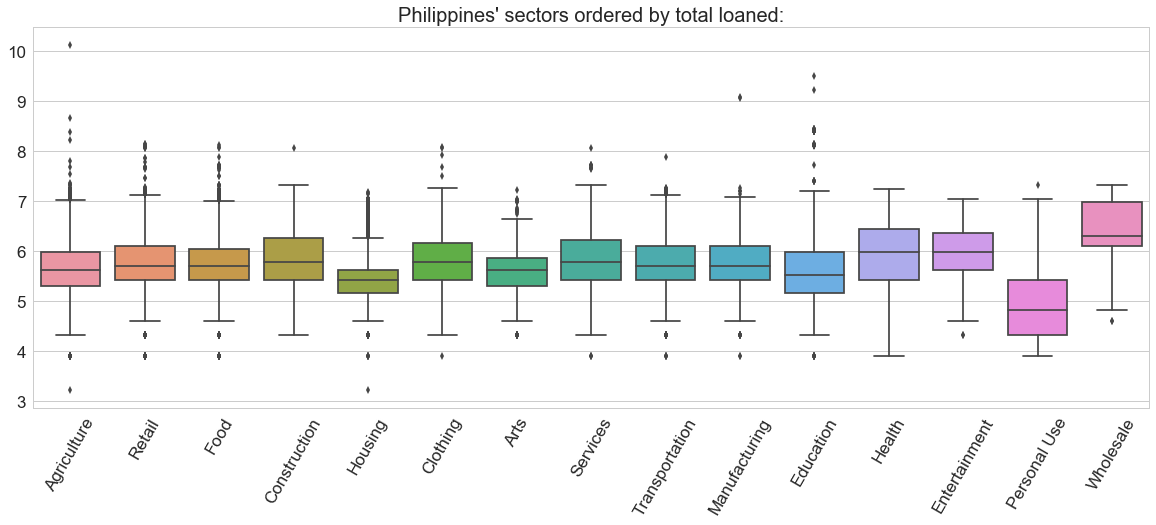

In [51]:
philippines['loan_amount_log'] = np.log(philippines['loan_amount'])
philippines['loan_amount_log']

plt.figure(figsize=(20, 7))

sns.set_style('whitegrid')
boxplot = sns.boxplot(x='sector', y='loan_amount_log', data=philippines)
boxplot.set(xlabel='', ylabel='')
plt.title("Philippines' sectors ordered by total loaned:", fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

Surprinsigly, in the case of the Philippines; Kiva decided to invest more in retail, food and then agriculture respectively. Let's analyze the reasoning for this.

### <a id='philippinesretail'>6.2.2 Analyzing the retail sector:</a>

In [52]:
# Saving only the loans that were used in General Stores:

philippines_retail = philippines[philippines['sector'] == 'Retail']
philippines_retail.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,tags,borrower_genders,repayment_interval,date,year,month,day,loan_amount_log,funded_amount_log,clean_borrower_genders
55,653123,700,700,General Store,Retail,"to buy additional items like eggs, charcoal, r...",PH,Philippines,"Brookes Point, Palawan",PHP,...,NaN,female,irregular,2014-01-02,2014,1,2,6.551080,6.551080,female
65,653242,325,325,General Store,Retail,"to purchase sugar, coffee, coffee creamer, can...",PH,Philippines,"Sinippil, Cauayan City, Isabela",PHP,...,volunteer_pick,female,irregular,2014-01-02,2014,1,2,5.783825,5.783825,female
71,653108,125,125,General Store,Retail,to buy goods to sell.,PH,Philippines,Pagadian - Lower Bagong Silang Pagadian City,PHP,...,"#Woman Owned Biz, #Parent, #Interesting Photo",female,irregular,2014-01-02,2014,1,2,4.828314,4.828314,female
91,653335,350,350,General Store,Retail,to buy additional groceries to sell,PH,Philippines,"Tanjay, Negros Oriental",PHP,...,NaN,female,irregular,2014-01-02,2014,1,2,5.857933,5.857933,female
96,653107,325,325,General Store,Retail,to buy additional stocks for her sari-sari store.,PH,Philippines,Plaridel-Cebulin,PHP,...,"#Elderly, #Schooling, #Woman Owned Biz",female,irregular,2014-01-02,2014,1,2,5.783825,5.783825,female


### <a id='philippinesactivity'>6.2.3 Analyzing the most common usage of loans in retail</a>

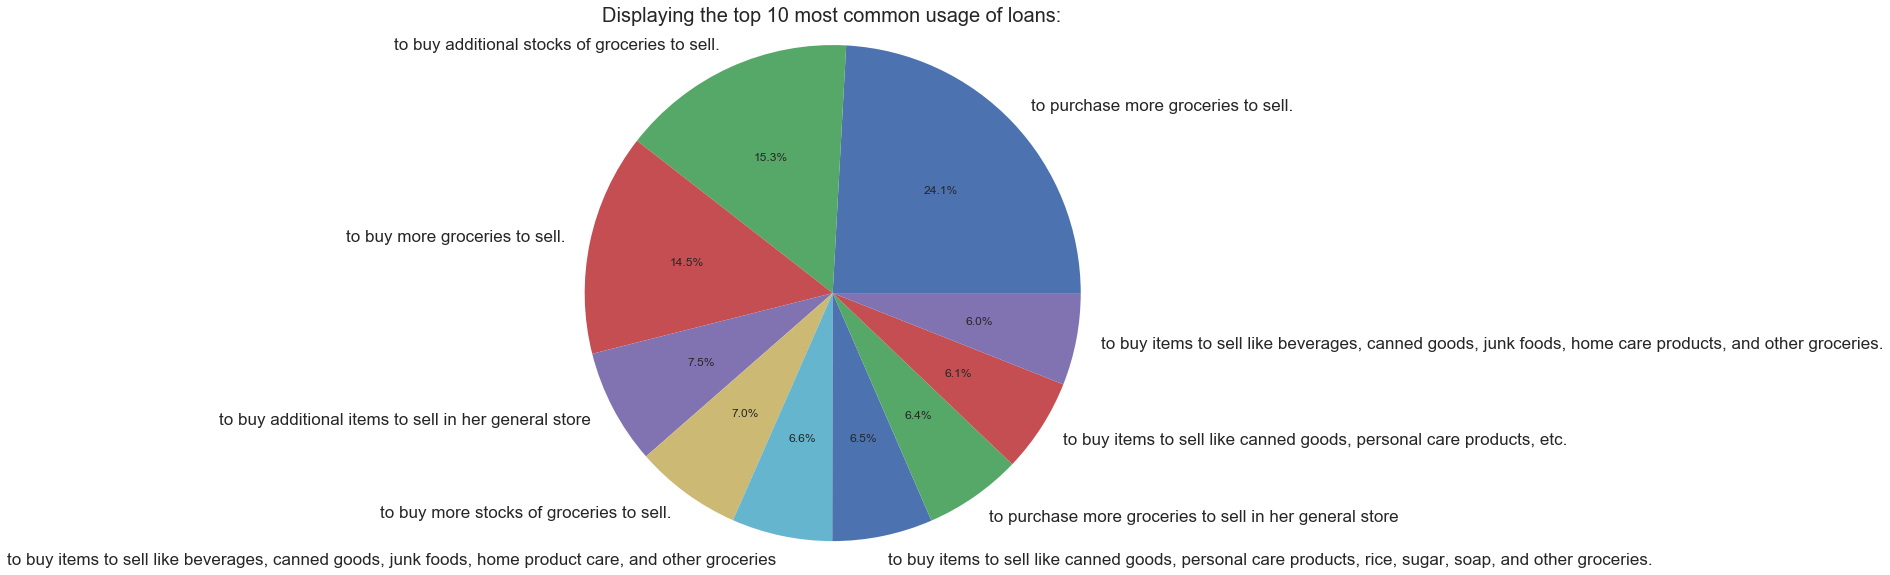

In [53]:
# Analyzing the most common usage of money in general stores:

philippines_use = pd.DataFrame(philippines_retail['use'].value_counts())
philippines_use.reset_index(inplace=True)
philippines_use.columns = ['use', 'total']

# Displaying the results in a pie chart:

plt.figure(figsize=(15, 8))

values = philippines_use['total'][:10]
labels = philippines_use['use'][:10]

plt.pie(values, labels=labels, autopct='%1.1f%%')
# pie.legend(labels, loc="right",fontsize=14)
plt.title('Displaying the top 10 most common usage of loans:', fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

Most of the borrowers have a tendency of buying groceries but they are resold to other people. In fact, the top 10 uses for loans are for buying groceries and resell them.
There can be many reasons for this:
* Some people can own smaller stores and sell merchandise to their clients.
* Others can sell them without having any stores and try to make a profit.
It also makes me believe that this borrowing pattern could be inflating the Philippines' loan distribution since it is the most popular reason to ask for a loan. It explains why food and agriculture are 2nd and 3rd respectively.

My questions then will be, if there is a way to find if the borrowers are selling these products at a higher price? Since the resell of products could lead to inflation of prices on basic foods, this can prevent for the unfortunate person to not be able to afford these inflated prices.

### <a id='philippinestimeline'>6.2.4 Analyzing whether this borrowing pattern has increased overtime based on the timeline provided in the dataset:</a>

In [54]:
# Changing the date column to to_datetime:

philippines['date'] = pd.to_datetime(philippines['date'])
philippines['year'] = pd.DataFrame(philippines['date'].dt.year)
philippines['month'] = pd.DataFrame(philippines['date'].dt.month)
philippines['day'] = pd.DataFrame(philippines['date'].dt.day)

[]

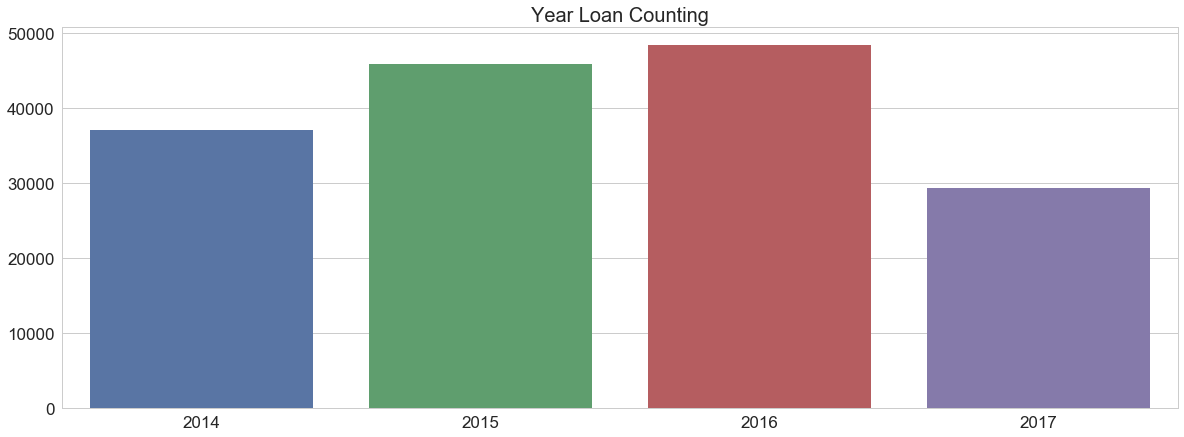

In [55]:
# Displaying the year by year loan amounts:

plt.figure(figsize=(20, 7))

sns.set_style("whitegrid")
countplot = sns.countplot(x=philippines['year'], data=philippines)
countplot.set(xlabel='', ylabel='')
plt.title("Year Loan Counting", fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.plot()

It seems that the Philippines loan amount decreased exponentially in 2017 (lower than 2014 and by almost half from the year before). The consequences are not very clear, but can it be related to the growing trend of buying and selling groceries?

### <a id='#philippinesrepayment'>6.2.5 Analyzing how Philippines repays their loans:</a>

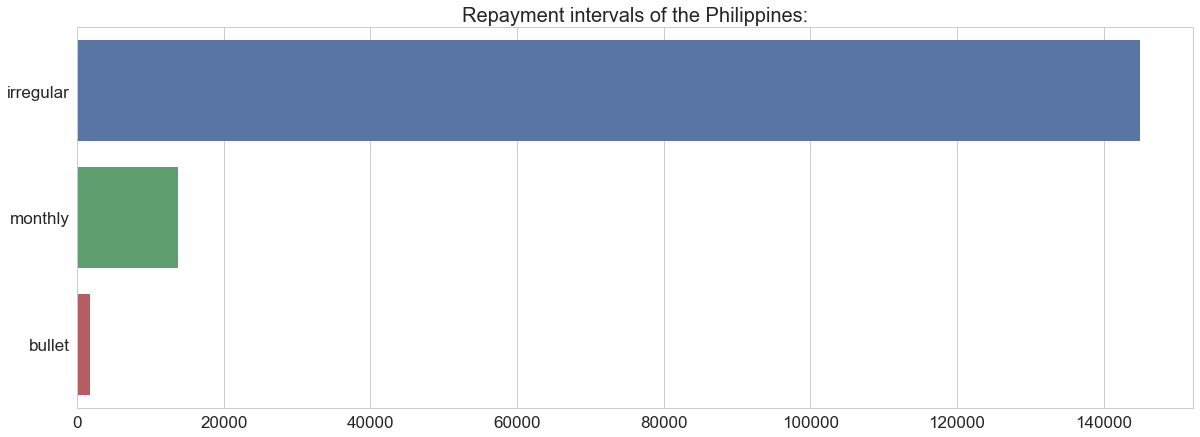

In [56]:
philippines_repayment = pd.DataFrame(philippines['repayment_interval'].value_counts())
philippines_repayment.reset_index(inplace=True)
philippines_repayment.columns = ['intervals', 'total_amount']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=philippines_repayment['total_amount'], y=philippines_repayment['intervals'])
barplot.set(xlabel='', ylabel='')
plt.title('Repayment intervals of the Philippines:', fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
plt.show()

The philippines has an irregular payment system rather than a monthly one. It seems that the borrowers pay their loans whenever they can instead of having a specified time frame.

# <a id='kenya'>7 Analyzing Kenya</a>

## <a id='kenyaintro'>7.1 Introduction of Kenya:</a>

Founding president and liberation struggle icon Jomo KENYATTA led Kenya from independence in 1963 until his death in 1978, when Vice President Daniel MOI took power in a constitutional succession. The country was a de facto one-party state from 1969 until 1982, after which time the ruling Kenya African National Union (KANU) changed the constitution to make itself the sole legal party in Kenya. MOI acceded to internal and external pressure for political liberalization in late 1991. The ethnically fractured opposition failed to dislodge KANU from power in elections in 1992 and 1997, which were marred by violence and fraud, but were viewed as having generally reflected the will of the Kenyan people. President MOI stepped down in December 2002 following fair and peaceful elections. Mwai KIBAKI, running as the candidate of the multiethnic, united opposition group, the National Rainbow Coalition (NARC), defeated KANU candidate Uhuru KENYATTA, the son of founding president Jomo KENYATTA, and assumed the presidency following a campaign centered on an anticorruption platform.<br>
KIBAKI's reelection in December 2007 brought charges of vote rigging from Orange Democratic Movement (ODM) candidate Raila ODINGA and unleashed two months of violence in which approximately 1,100 people died. African Union-sponsored mediation led by former UN Secretary General Kofi ANNAN in late February 2008 resulted in a power-sharing accord bringing ODINGA into the government in the restored position of prime minister. The power sharing accord included a broad reform agenda, the centerpiece of which was constitutional reform. In August 2010, Kenyans overwhelmingly adopted a new constitution in a national referendum. The new constitution introduced additional checks and balances to executive power and significant devolution of power and resources to 47 newly created counties. It also eliminated the position of prime minister following the first presidential election under the new constitution, which occurred in March 2013. Uhuru KENYATTA won the election and was sworn into office in April 2013; he began a second term in November 2017.<br>
<em>Source: https://www.cia.gov/library/publications/the-world-factbook/geos/ke.html</em>

## <a id='kenyadataset'>7.2 Analyzing only Kenya from the dataset:</a>

In [57]:
kenya = pd.DataFrame(kiva_loans[kiva_loans['country'] == 'Kenya'])
kenya.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,tags,borrower_genders,repayment_interval,date,year,month,day,loan_amount_log,funded_amount_log,clean_borrower_genders
5,1080148,250,250,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,NaN,female,irregular,2014-01-01,2014,1,1,5.521461,5.521461,female
46,653185,250,250,Fruits & Vegetables,Food,"to purchase sacks of tomatoes, potatoes, fruit...",KE,Kenya,Voi,KES,...,#Vegan,female,irregular,2014-01-02,2014,1,2,5.521461,5.521461,female
57,653237,250,250,Cosmetics Sales,Retail,"to purchase body lotions, hair oil, jewelery, ...",KE,Kenya,Likoni,KES,...,volunteer_pick,female,irregular,2014-01-02,2014,1,2,5.521461,5.521461,female
58,653229,250,250,Tailoring,Services,to purchase cloth materials and sewing thread ...,KE,Kenya,Likoni,KES,...,"#First Loan, user_favorite",female,irregular,2014-01-02,2014,1,2,5.521461,5.521461,female
67,1080150,125,125,Energy,Services,purchase solar lanterns for resale.,KE,Kenya,NaN,KES,...,NaN,male,irregular,2014-01-02,2014,1,2,4.828314,4.828314,male


### <a id='kenyasector'>7.2.1 Displaying where the loans are going based in the sector:</a>

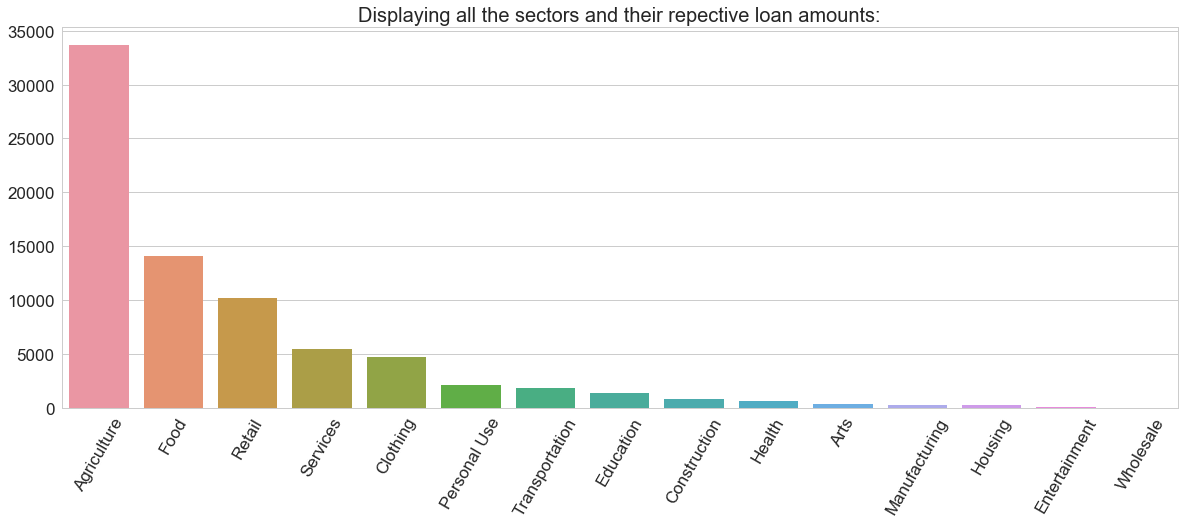

In [58]:
# Creating and saving the different sectors:

kenya_sector = pd.DataFrame(kenya['sector'].value_counts(sort='loan_amount'))
kenya_sector.reset_index(inplace=True)
kenya_sector.columns = ['country', 'total_amount']
kenya_sector

plt.figure(figsize=(20, 7))

sns.set_style('whitegrid')
barplot = sns.barplot(x=kenya_sector['country'], y=kenya_sector['total_amount'])
barplot.set(xlabel='', ylabel='')
plt.title('Displaying all the sectors and their repective loan amounts:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

### <a id='kenyaactivity'>7.2.2 Analyzing the Agriculture sector in more detail:</a>

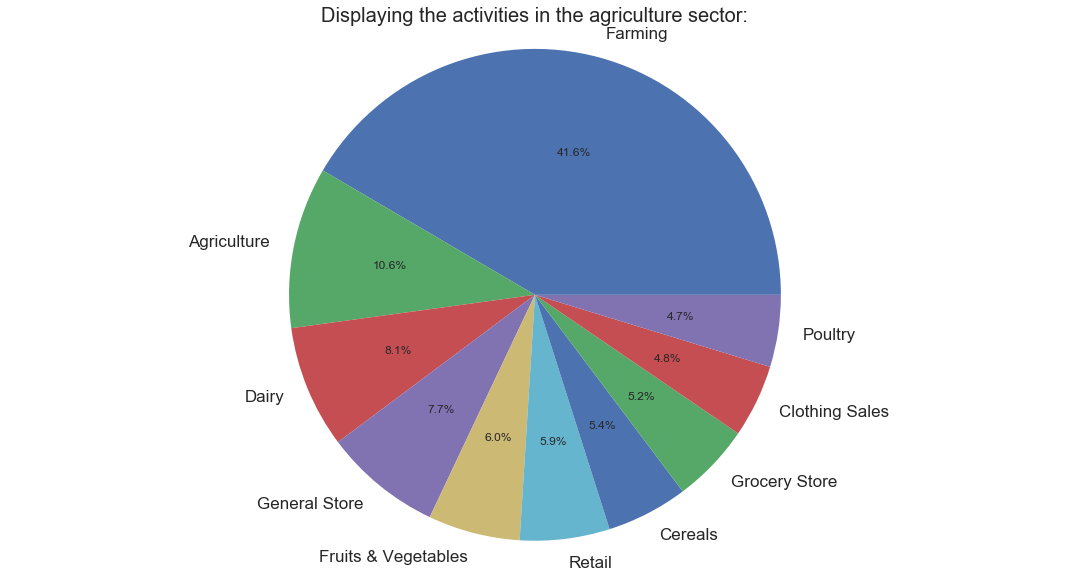

In [59]:
kenya_activity = pd.DataFrame(kenya['activity'].value_counts(sort=['loan_amount']))
kenya_activity.reset_index(inplace=True)
kenya_activity.columns = ['activity', 'total_amount']

# Displaying each activity in a pie chart:

plt.figure(figsize=(15, 8))

plt.pie(kenya_activity['total_amount'][:10], labels=kenya_activity['activity'][:10], autopct='%1.1f%%')
plt.title('Displaying the activities in the agriculture sector:', fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

Kenya's investment is more in par to the overall investments since agriculture is considered to be the more succesful type of investment in poor countries, with the highest yield of return and tends to have an accessible entry point for most people.

# <a id='salvador'>8 Analyzing El Salvador</a>

## <a id='salvadorintro'>8.1 Introduction to El Salvador:</a>

El Salvador achieved independence from Spain in 1821 and from the Central American Federation in 1839. A 12-year civil war, which cost about 75,000 lives, was brought to a close in 1992 when the government and leftist rebels signed a treaty that provided for military and political reforms. El Salvador is beset by one of the world’s highest homicide rates and pervasive criminal gangs.<br>
<em>Source: https://www.cia.gov/library/publications/the-world-factbook/geos/es.html</em>

## <a id='salvadordataset'>8.2 Displaying only El Salvador from the dataset:</a>

In [60]:
salvador = kiva_loans[kiva_loans['country'] == 'El Salvador']
salvador.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,tags,borrower_genders,repayment_interval,date,year,month,day,loan_amount_log,funded_amount_log,clean_borrower_genders
49,653418,450,450,General Store,Retail,to stock his store.,SV,El Salvador,NaN,USD,...,"#Repeat Borrower, user_favorite",male,monthly,2014-01-02,2014,1,2,6.109248,6.109248,male
202,653360,500,500,General Store,Retail,"to buy beans, oil, sugar, coffee, sweets, soft...",SV,El Salvador,NaN,USD,...,"#Woman Owned Biz, user_favorite",female,monthly,2014-01-02,2014,1,2,6.214608,6.214608,female
211,653413,550,550,Food Production/Sales,Food,"to buy corn, firewood, and propane gas, and to...",SV,El Salvador,"San Miguel, San Miguel",USD,...,user_favorite,female,monthly,2014-01-02,2014,1,2,6.309918,6.309918,female
215,653374,500,500,Personal Housing Expenses,Housing,"to buy cement, iron, and hurricane fencing",SV,El Salvador,NaN,USD,...,"volunteer_like, #Supporting Family",male,monthly,2014-01-02,2014,1,2,6.214608,6.214608,male
255,653425,300,300,Fruits & Vegetables,Food,to buy fruit and vegetables wholesale like ora...,SV,El Salvador,NaN,USD,...,user_favorite,female,monthly,2014-01-02,2014,1,2,5.703782,5.703782,female


## <a id='salvadorsector'>8.3 Displaying where the loans are invested by sector:</a>

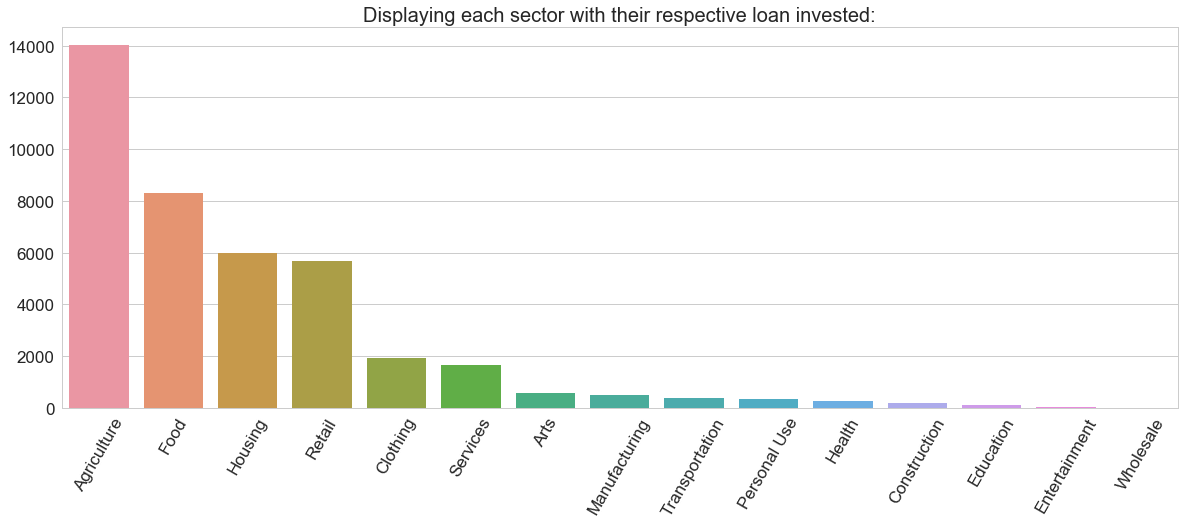

In [61]:
salvador_sector = pd.DataFrame(salvador['sector'].value_counts(sort='loan_amount'))
salvador_sector.reset_index(inplace=True)
salvador_sector.columns = ['sector', 'total_amount']
salvador_sector

plt.figure(figsize=(20, 7))

sns.set_style('whitegrid')
barplot = sns.barplot(x=salvador_sector['sector'], y=salvador_sector['total_amount'])
barplot.set(xlabel='', ylabel='')
plt.title('Displaying each sector with their respective loan invested:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

### <a id='salvadoractivity'>8.3.1 Analyzing the activities in agriculture:</a>

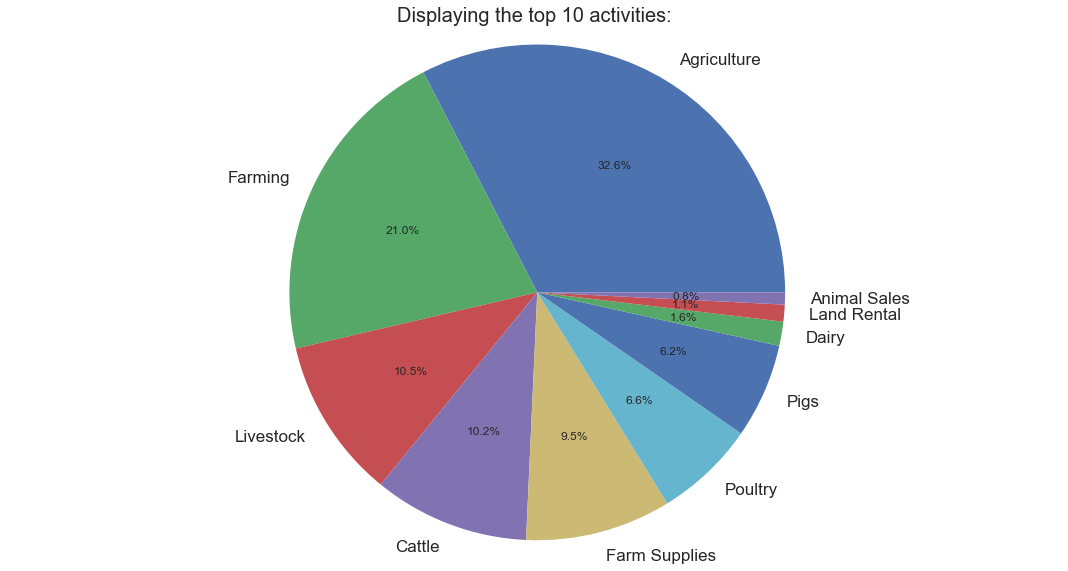

In [62]:
salvador_agriculture = pd.DataFrame(salvador[salvador['sector'] == 'Agriculture'])
salvador_agriculture = pd.DataFrame(salvador_agriculture['activity'].value_counts(sort='loan_amount'))
salvador_agriculture.reset_index(inplace=True)
salvador_agriculture.columns = ['activity', 'total_amount']
salvador_agriculture

plt.figure(figsize=(15, 8))

plt.pie(salvador_agriculture['total_amount'][:10], labels=salvador_agriculture['activity'][:10], autopct='%1.1f%%')
plt.title('Displaying the top 10 activities:', fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

In El Salvador, agriculture is the main investments that is made followed by farming.

### <a id='salvadoruse'>8.3.2 Analyzing the different uses of the money in agriculture:</a>

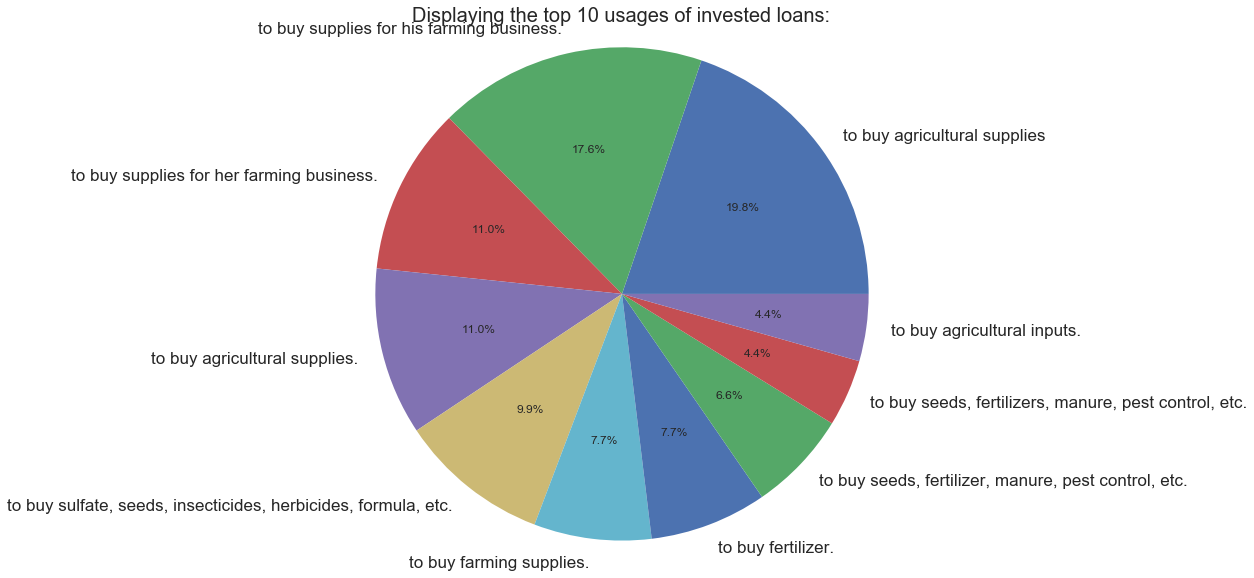

In [63]:
salvador_use = pd.DataFrame(salvador[salvador['activity'] == 'Agriculture'])
salvador_use = pd.DataFrame(salvador_use['use'].value_counts(sort='loan_amount'))
salvador_use.reset_index(inplace=True)
salvador_use.columns = ['use', 'total_amount']

plt.figure(figsize=(15, 8))

plt.pie(salvador_use['total_amount'][:10], labels=salvador_use['use'][:10], autopct='%1.1f%%')
plt.title('Displaying the top 10 usages of invested loans:', fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

It seems that Salvadorians are investing most of their loans to buy supplies for agricultural supplies and development.